In [1]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils


import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 


import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import copy
import numpy as np

In [2]:
df = MyPyTable()
df.load_from_file("high_diamond_ranked_10min.csv")
y = df.get_column("blueWins")

X = copy.deepcopy(df.data)
# randomizing indexes to sort out a stratified sample
X_indexes = [ i for i in range(len(X))]
myutils.randomize_in_place(X_indexes,y,0)
grouped_X =[]
grouped_y = []
for i in range(len(X)):
    if grouped_y.count(y[i]) >0:
        grouped_X[grouped_y.index(y[i])].append(X_indexes[i])
    else:
        grouped_y.append(y[i])
        grouped_X.append([X_indexes[i]])
X_data = []
y_data = []
for i in range(1500):
    for j in range(len(grouped_X)):
        X_data.append(X[grouped_X[j][i]])
        y_data.append(grouped_y[j])

X = copy.deepcopy(X_data)

y = copy.deepcopy(y_data)
for entry in X:
    del entry[0]
    del entry[0]
knn_clf = MyKNeighborsClassifier()
nb_clf = MyNaiveBayesClassifier()
dummy_clf = MyDummyClassifier()
tree_clf = MyDecisionTreeClassifier()
nb_clf = MyNaiveBayesClassifier()

In [3]:
myutils.compute_clf_stats(knn_clf,X,y,"kNN Classifier")
myutils.compute_clf_stats(dummy_clf,X,y,"Dummy Classifier")


Hold-Out Method
kNN Classifier : accuracy =  0.6909090909090909  error =  0.3090909090909091
binary precision:  0.6915322580645161
binary recall:  0.6915322580645161
f1 score:  0.6915322580645161
Confusion Matrix
[[341, 153], [153, 343]]

Hold-Out Method
Dummy Classifier : accuracy =  0.5  error =  0.5
binary precision:  0.0
binary recall:  0.0
f1 score:  0
Confusion Matrix
[[495, 0], [495, 0]]


In [4]:
header = df.column_names.copy()
del header[0:2]
del header[-9:-1]
del header[-1]
del header[10:15]
del header[12:14]
print(header)

['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueGoldDiff', 'blueExperienceDiff', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed']


In [5]:
X = copy.deepcopy(X_data)

for entry in X:
    del entry[0:2]
    del entry[-9:-1]
    del entry[-1]
    del entry[10:15]
    del entry[12:14]

myutils.compute_clf_stats(knn_clf,X,y,"kNN Classifier")
myutils.compute_clf_stats(dummy_clf,X,y,"Dummy Classifier")


Hold-Out Method
kNN Classifier : accuracy =  0.6525252525252525  error =  0.3474747474747475
binary precision:  0.6583333333333333
binary recall:  0.6370967741935484
f1 score:  0.6475409836065574
Confusion Matrix
[[316, 180], [164, 330]]

Hold-Out Method
Dummy Classifier : accuracy =  0.5  error =  0.5
binary precision:  0.0
binary recall:  0.0
f1 score:  0
Confusion Matrix
[[495, 0], [495, 0]]


In [6]:
# equal width binning
X = copy.deepcopy(X_data)
y = [str(value) for value in y]
for entry in X:
    del entry[0:2]
    del entry[-9:-1]
    del entry[-1]
    del entry[10:15]
    del entry[12:14]
for j in range(len(X[0])):
    binned_col = myutils.binning([row[j] for row in X])
    for i in range(len(X)):
        X[i][j] = binned_col[i]


In [7]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,5,3,3)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6555555555555556  error =  0.34444444444444444


In [8]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,20,11,3)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6575757575757576  error =  0.3424242424242424


In [9]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,20,7,5)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6777777777777778  error =  0.3222222222222222


In [10]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,20,7,10)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.6717171717171717  error =  0.3282828282828283


In [11]:
X = copy.deepcopy(X_data)
y = [str(value) for value in y]
for entry in X:
    del entry[0:2]
for j in range(len(X[0])):
    binned_col = myutils.binning([row[j] for row in X])
    for i in range(len(X)):
        X[i][j] = binned_col[i]

In [12]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)
M_vals = [10,20,20,40,50]
F_vals = [3,5,7,9,11]

for m in M_vals:
    for f in F_vals:
        forest_clf = MyRandomForestClassifier()
        forest_clf.fit(X_train,y_train,m,m//3,f)
        y_pred_clf = forest_clf.predict(X_test)

        accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
        print("Hold-Out Method: M = ", m, " N = ", m//3, " F = ", f)
        print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method: M =  10  N =  3  F =  3
Random Forest : accuracy =  0.6575757575757576  error =  0.3424242424242424
Hold-Out Method: M =  10  N =  3  F =  5
Random Forest : accuracy =  0.6898989898989899  error =  0.3101010101010101
Hold-Out Method: M =  10  N =  3  F =  7
Random Forest : accuracy =  0.6737373737373737  error =  0.32626262626262625
Hold-Out Method: M =  10  N =  3  F =  9
Random Forest : accuracy =  0.6868686868686869  error =  0.31313131313131315
Hold-Out Method: M =  10  N =  3  F =  11
Random Forest : accuracy =  0.6868686868686869  error =  0.31313131313131315
Hold-Out Method: M =  20  N =  6  F =  3
Random Forest : accuracy =  0.6545454545454545  error =  0.34545454545454546
Hold-Out Method: M =  20  N =  6  F =  5
Random Forest : accuracy =  0.697979797979798  error =  0.30202020202020197
Hold-Out Method: M =  20  N =  6  F =  7
Random Forest : accuracy =  0.6868686868686869  error =  0.31313131313131315
Hold-Out Method: M =  20  N =  6  F =  9
Random Forest : a

In [13]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,50,10,4)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.7222222222222222  error =  0.2777777777777778


In [14]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,50,11,8)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.693939393939394  error =  0.30606060606060603


In [15]:
X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)

forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,50,11,15)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print("Hold-Out Method")
print("Random Forest : accuracy = ", accuracy, " error = ", 1 - accuracy)

Hold-Out Method
Random Forest : accuracy =  0.702020202020202  error =  0.297979797979798


Now we seek to find a compact feature set for a predictor to deploy to the web.

In [3]:
header = df.column_names.copy()

del header[0:8]
del header[2:9]
del header[4:]
print(header)

X = copy.deepcopy(X_data)
y = [str(value) for value in y]
for entry in X:
    del entry[0:8]
    del entry[2:9]
    del entry[4:]
for j in range(len(X[0])):
    binned_col = myutils.binning([row[j] for row in X])
    for i in range(len(X)):
        X[i][j] = binned_col[i]

['blueEliteMonsters', 'blueDragons', 'blueGoldDiff', 'blueExperienceDiff']


In [7]:
myutils.compute_clf_stats(knn_clf,X,y,"kNN Classifier")
myutils.compute_clf_stats(tree_clf,X,y,"Decision Tree Classifier")
myutils.compute_clf_stats(nb_clf,X,y,"Naive_Bayes Classifier")

print(tree_clf.attribute_domains)

X_train, X_test, y_train,y_test = myevaluation.train_test_split(X,y,random_state=0)
forest_clf = MyRandomForestClassifier()
forest_clf.fit(X_train,y_train,10,3,2)
y_pred_clf = forest_clf.predict(X_test)

accuracy = myevaluation.accuracy_score(y_test,y_pred_clf)
print()
print("Hold-Out Method")
print("Random Forest Classifier: accuracy = ", accuracy, " error = ", 1 - accuracy)



Hold-Out Method
kNN Classifier : accuracy =  0.6686868686868687  error =  0.33131313131313134
binary precision:  0.6161335187760779
binary recall:  0.8949494949494949
f1 score:  0.729818780889621
Confusion Matrix
[[443, 52], [276, 219]]

Hold-Out Method
Decision Tree Classifier : accuracy =  0.6747474747474748  error =  0.32525252525252524
binary precision:  0.6883116883116883
binary recall:  0.6411290322580645
f1 score:  0.6638830897703549
Confusion Matrix
[[350, 144], [178, 318]]

Hold-Out Method
Naive_Bayes Classifier : accuracy =  0.5  error =  0.5
binary precision:  0.5
binary recall:  1.0
f1 score:  0.6666666666666666
Confusion Matrix
[[495, 0], [495, 0]]
{'att0': ['-1.0 - 0.0', '0.0 - 1.0', '1.0 - 2.0'], 'att1': ['0.0', '1.0'], 'att2': ['-9152.0 - -7360.0', '1608.0 - 3400.0', '3400.0 - 5192.0', '5192.0 - 6984.0', '6984.0 - 8776.0'], 'att3': ['-8290.0 - -6627.0', '1696.0 - 3359.0', '3359.0 - 5022.0', '5022.0 - 6685.0', '6685.0 - 8348.0']}

Hold-Out Method
Random Forest Classifie

## EDA
The following are some graphs that help us identify some interesting relationships. Starting with sorting the table into TWO tables with all the data of blue wins and all the data with red wins.

In [16]:
data = MyPyTable()
data.load_from_file('high_diamond_ranked_10min.csv')
blue_wins_table = []
blue_loses_table = []

for row in data.data:
    if row[1] == 1: # blue wins
        blue_wins_table.append(row)
    elif row[1] == 0: # red wins
        blue_loses_table.append(row)

print(data.column_names)
blue_wins_df = MyPyTable(column_names=data.column_names, data=blue_wins_table)
blue_loses_df = MyPyTable(column_names=data.column_names, data=blue_loses_table)
print(blue_wins_df.column_names)

['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKil

## Graphing Blue Stats VS Red Stats when Blue WINS

In [17]:
import matplotlib.pyplot as plt

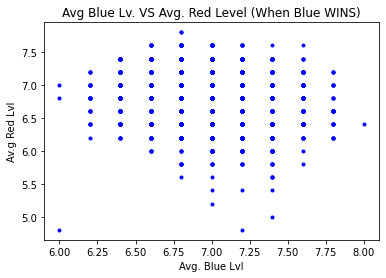

In [18]:
blue_avg_level = blue_wins_df.get_column('blueAvgLevel')
red_avg_level = blue_wins_df.get_column('redAvgLevel')

plt.plot(blue_avg_level, red_avg_level, "b.")
plt.title('Avg Blue Lv. VS Avg. Red Level (When Blue WINS)')
plt.xlabel('Avg. Blue Lvl')
plt.ylabel('Av.g Red Lvl')
plt.show()

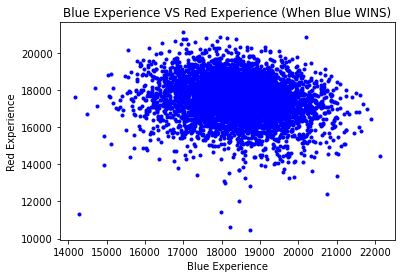

In [19]:
blue_exp = blue_wins_df.get_column('blueTotalExperience')
red_exp = blue_wins_df.get_column('redTotalExperience')

plt.plot(blue_exp, red_exp, "b.")
plt.title('Blue Experience VS Red Experience (When Blue WINS)')
plt.xlabel('Blue Experience')
plt.ylabel('Red Experience')
plt.show()

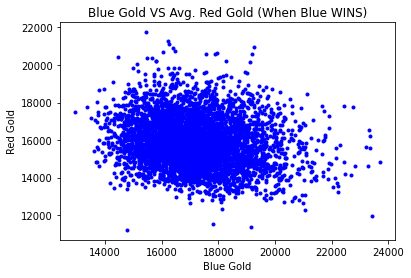

In [20]:
blue_gold = blue_wins_df.get_column('blueTotalGold')
red_gold = blue_wins_df.get_column('redTotalGold')

plt.plot(blue_gold, red_gold, "b.")
plt.title('Blue Gold VS Avg. Red Gold (When Blue WINS)')
plt.xlabel('Blue Gold')
plt.ylabel('Red Gold')
plt.show()

## Does Getting the First Kill Matter?

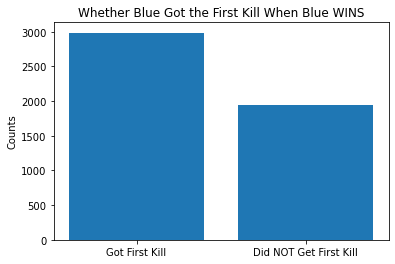

In [21]:
x = [1,2]
counts = [0,0]
for row in blue_wins_df.data:
    if row[4] == 1:
        counts[0] += 1
    elif row[4] == 0:
        counts[1] += 1

plt.bar(np.arange(len(x)), counts)
plt.xticks(np.arange(len(x)), ['Got First Kill', 'Did NOT Get First Kill'])
plt.ylabel('Counts')
plt.title('Whether Blue Got the First Kill When Blue WINS')
plt.show()

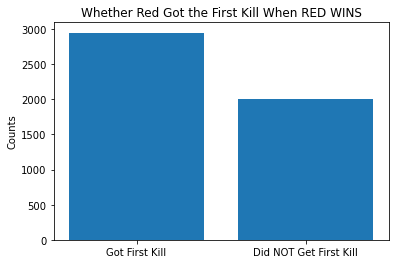

In [22]:
x = [1,2]
counts = [0,0]
for row in blue_loses_df.data:
    if row[23] == 1:
        counts[0] += 1
    elif row[23] == 0:
        counts[1] += 1

plt.bar(np.arange(len(x)), counts)
plt.xticks(np.arange(len(x)), ['Got First Kill', 'Did NOT Get First Kill'])
plt.ylabel('Counts')
plt.title('Whether Red Got the First Kill When RED WINS')
plt.show()

## Calculating and Plotting Kill/Death Ratio

In [23]:
print(blue_wins_df.column_names)

['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


In [24]:
header = blue_wins_df.column_names
header.append(['BlueKillDeathRatio', 'RedKillDeathRatio'])

blue_wins_df.column_names = header
blue_loses_df.column_names = header

for row in blue_wins_df.data:
    if row[6] == 0:
        if row[25] == 0:
            row.append([0,0])
        else:
            row.append([0, row[24]/row[25]])

    if row[25] == 0:
        row.append([row[5]/row[6],0])

for row in blue_loses_df.data:
    if row[6] == 0:
        if row[25] == 0:
            row.append([0,0])
        else:
            row.append([0, row[24]/row[25]])

    if row[25] == 0:
        row.append([row[5]/row[6],0])